RIDGE REGRESSION

In [3]:
# prompt: load the dataset

# Import pandas library
import pandas as pd

# Read the dataset from a CSV file
df = pd.read_csv('spotify_songs.csv')

# Print the first five rows of the dataset
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
print(df.describe())


       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

In [5]:
print(df.dtypes)
print(df.isnull().sum())


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_al

In [6]:
data = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])


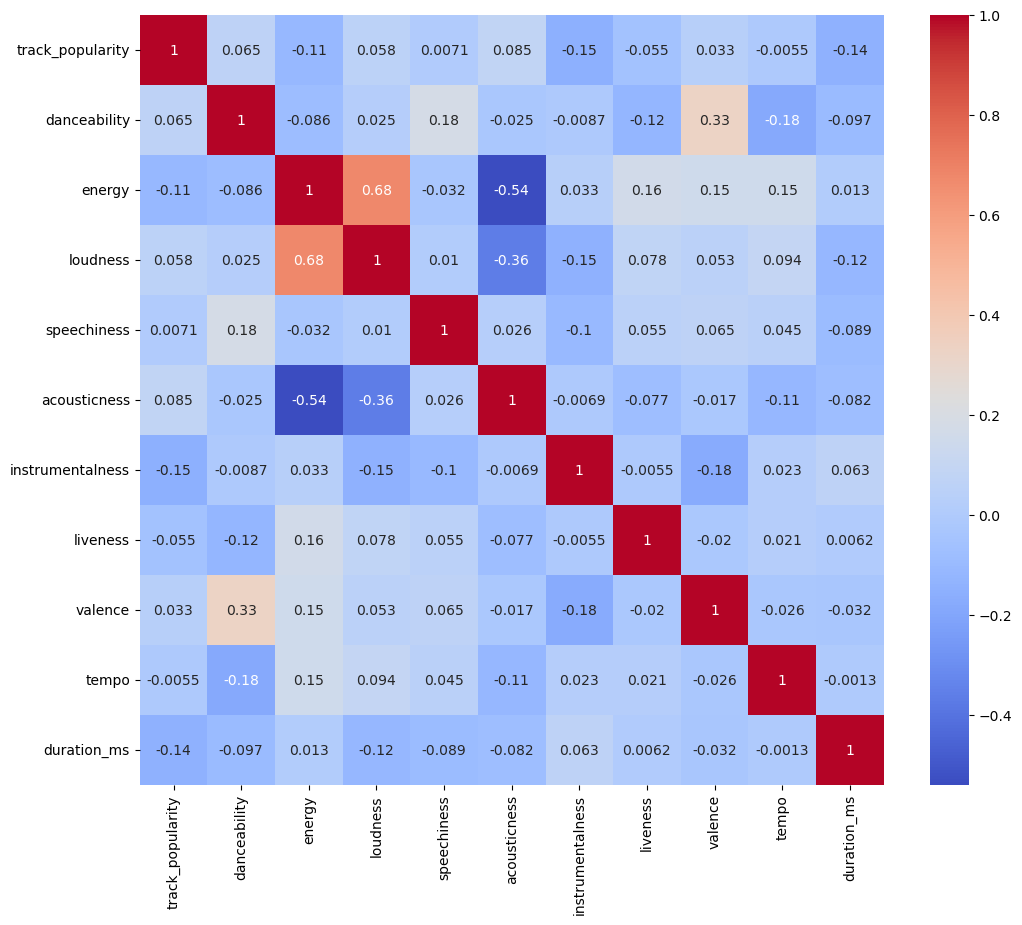

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = data[['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [1]:
from sklearn.preprocessing import StandardScaler

In [9]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
scaler = StandardScaler()
data.loc[:, features] = scaler.fit_transform(data[features])

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = data[features]
y = data['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("R^2 Score:", score)


R^2 Score: 0.06543135618875351


In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Now, X_poly contains the original features plus the interaction/polynomial terms


In [12]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Defining a range of alpha to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Ridge regression with built-in cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_poly, y_train)

# Best alpha and R^2 score
best_alpha = ridge_cv.alpha_
print("Best alpha:", best_alpha)
print("R^2 Score with polynomial features:", ridge_cv.score(X_test_poly, y_test))


Best alpha: 100.0
R^2 Score with polynomial features: 0.07903808378069155


In [14]:
# Optionally, examine the mean squared errors from cross-validation
cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
print("CV MSE for each alpha:", cv_mse)


CV MSE for each alpha: [569.96459817 569.96457284 569.96432039 569.96187831 569.94518343]


In [15]:
from sklearn.linear_model import RidgeCV

# Assuming X and y are already defined and preprocessed
# Defining a broader range of alpha to test
alphas = np.logspace(-6, 6, 13)  # Creates 13 values per decade from 10^-6 to 10^6

# Ridge regression with built-in cross-validation, using a finer grid of alpha values
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Best alpha and corresponding R^2 score
print("Best alpha:", ridge_cv.alpha_)
print("Best R^2 Score:", ridge_cv.score(X_test, y_test))

# Optionally, examine the mean squared errors from cross-validation
cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
print("CV MSE for each alpha:", cv_mse)


Best alpha: 10.0
Best R^2 Score: 0.06544166909164695
CV MSE for each alpha: [580.98794809 580.98794809 580.98794809 580.98794806 580.98794782
 580.98794537 580.9879211  580.98770306 580.98791569 581.1740677
 586.5904212  610.25569267 624.23831266]


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)


MSE: 573.7193658299801
MAE: 19.968504828668788


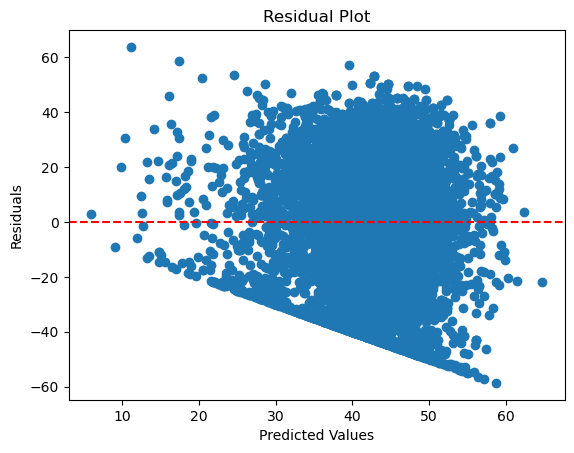

In [17]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [18]:
feature_names = X.columns
ridge_coefficients = ridge_cv.coef_
for feature, coef in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coef}")


danceability: 0.7142534989156388
energy: -5.5539326617328015
loudness: 4.671822274948326
speechiness: -0.8095697353115483
acousticness: 0.7499553944854824
instrumentalness: -2.6693782311466663
liveness: -0.627980378401503
valence: 0.6783249161675826
tempo: 0.5595547289074716
duration_ms: -2.7209768888309043


LINEAR REGRESSION


In [22]:
sorted_spotify_songs = data.sort_values(by='track_popularity', ascending=True)
sorted_spotify_songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11647,3suGVjo7xyvFbK0WHbDlUA,Lua Lua Lua - Live,Miguel Rios,0,5fstCqs5NpIlF42VhPNv23,Rock & Rios (Remastered),2005-01-01,Rock and Rios,2gpKfzXEi8QWvgBNPDPk5R,rock,...,5,-1.128782,1,-0.059755,-0.681801,-0.376857,5.034154,-0.010962,-0.961767,-0.492630
18991,0uJrYOhFXe4Y86JXPPMqt1,Ay Amor - Reggaeton,Hector & Tito,0,3syIceuWeZKFbuVubOsS4W,La Historia Live,2003-01-01,Reggaeton Classics,37i9dQZF1DX8SfyqmSFDwe,latin,...,9,0.706864,1,-0.274946,0.089457,-0.377922,-0.545493,0.529467,-1.152451,0.150014
18993,1b4QQFr0kifiSkzHb5kni4,Dejale Caer To Peso,Yomo,0,02aLmclNogrHwzJnrD3oBX,Sangre Nueva Special Edition,2006-01-01,Reggaeton Classics,37i9dQZF1DX8SfyqmSFDwe,latin,...,3,-0.426445,0,0.749679,0.043928,-0.377985,-0.828687,1.078474,-0.923965,0.406049
18994,4EoDcHQ7lOj4RGgRibFLXh,Un Sueño,R.K.M & Ken-Y,0,0VKEkSWbmAyBEVuvlhMmas,Reggaeton Hits Factory,2007-01-01,Reggaeton Classics,37i9dQZF1DX8SfyqmSFDwe,latin,...,1,0.589082,1,-0.442755,-0.083552,-0.229930,0.770034,1.262907,-0.961879,0.328069
19127,4YAcCjGlRfpcFLyxiI54K7,No Es Culpa Mía,DY,0,6pa7ftXvhHJWLvuE4A5mLI,No Es Culpa Mía,2017-05-24,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,10,0.797207,1,-0.083445,1.191255,-0.377978,-0.715280,0.872597,-0.997302,-1.975828


In [23]:
sample = sorted_spotify_songs.sample(frac=0.31)
sample.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
17879,69xPBNXUGp36kirkxbJiOW,No Te Pido Flores,Fanny Lu,1,7scOy9mbUmkZjZdyuNdocO,Lagrimas Calidas (International Version),2006,MIX LATIN POP°,6IS6XTdbS9qJZgfjNKgpB8,latin,...,1,1.037454,1,-0.440781,1.013693,-0.377985,-0.607057,1.576013,-0.629131,0.262439
4172,4jJEQg6mr3fQsUCYTwhBEZ,Sun,Two Door Cinema Club,60,6CPwf8Yo8a4cgBDVeShL5C,Beacon,2012-09-03,Indie/Jazz Poptimism,6OaTudLqBEuTyUMPxRNpZc,pop,...,4,0.428472,0,-0.781335,-0.748273,-0.376874,-0.558453,0.696743,-0.888505,-0.636358
26202,1lCutqtm2c3N8BNuYMCTCQ,Blue (feat. Benaddict & Marcelo Gallo),Gas Lab,17,2inGzQmiNjIoT5BoK2TwDV,Fusion,2017-03-08,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,r&b,...,5,0.669388,0,4.184838,0.672226,-0.377985,-0.195549,-0.002384,0.399408,-1.018054
6324,1MUL6DO2gVimj2YrVedubd,Creep On Me,GASHI,68,2NK3KTJzSc3zW8DUwcW9Uq,Creep On Me,2018-08-22,Hip-Hop Mixtape,37i9dQZF1DWVdgXTbYm2r0,rap,...,9,0.775792,0,0.325220,0.781495,-0.377939,0.044226,-0.023830,0.509766,-0.518418
7078,3Of5Vvox7DstYj6oET5b2h,It's Goin' Down (feat. Nitti),Yung Joc,24,6IUWw1FQfwZRC0CSpsEiw2,New Joc City,2006-06-06,Dirty South Rap Classics by DJ HOTSAUCE,0tLHH1C4HkWEUCXXSSjbOe,rap,...,1,-0.328740,0,-0.452626,-0.349441,-0.377985,-0.383482,0.422239,-1.370863,0.268121


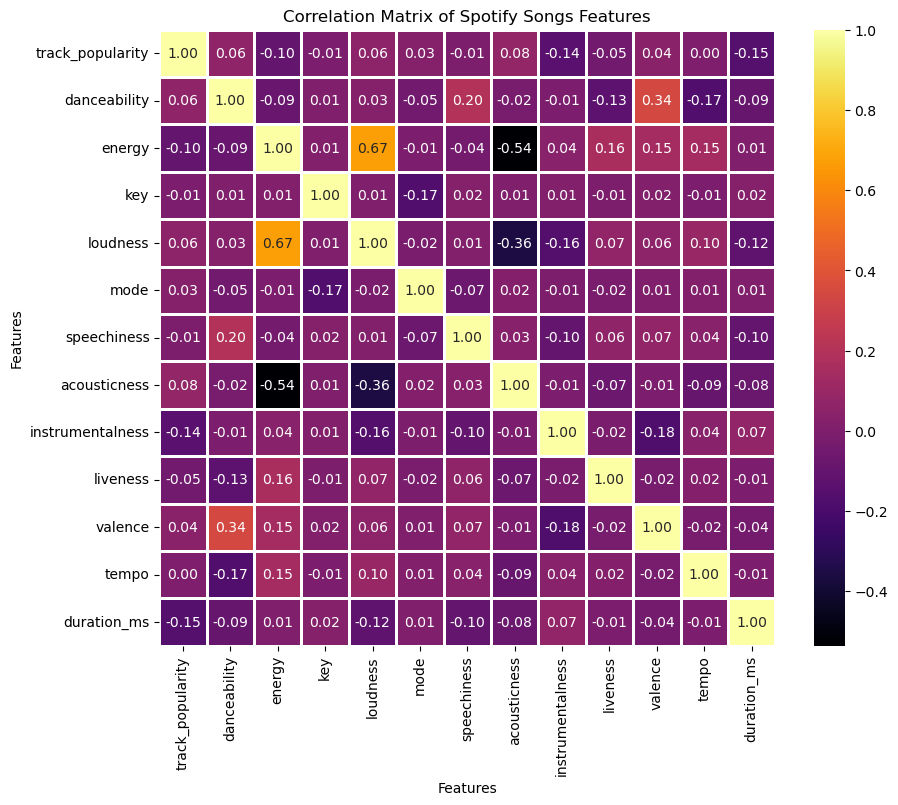

In [24]:
# Select only numeric columns for the correlation matrix
numeric_df = sample.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', 
            square=True, linecolor='white', linewidths=1)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Spotify Songs Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Selecting relevant features for the model (ignoring identifiers and categorical data)
features = sample[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
target = sample['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R2: ", r2)


Test MSE:  588.5221700252721
Test R2:  0.07099965659332519


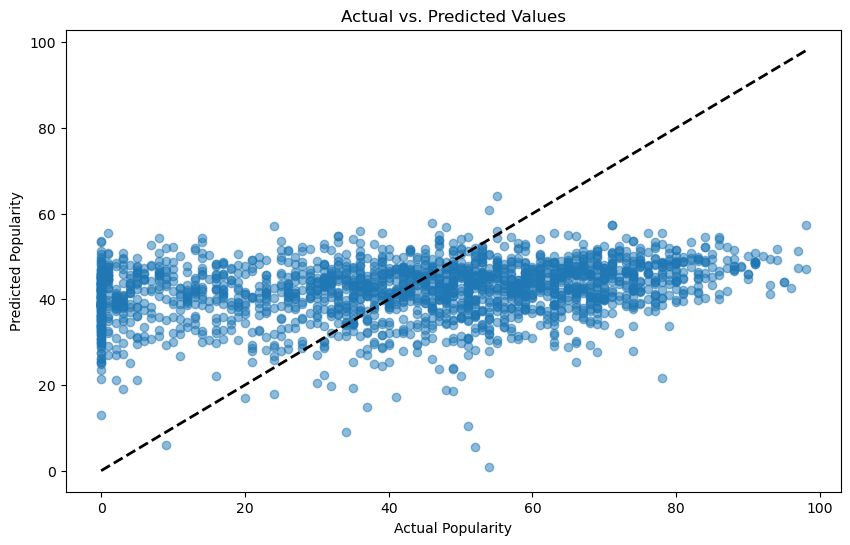

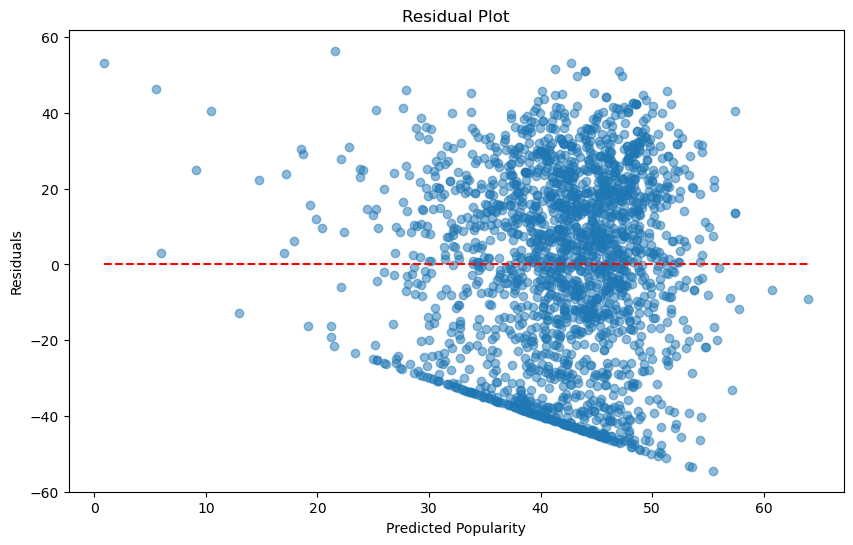

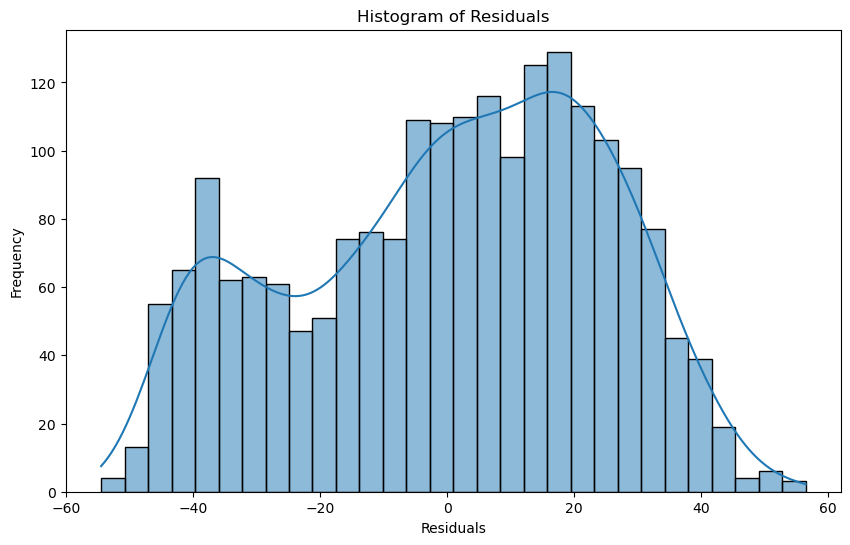

In [29]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')  # Zero line for reference
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

[Text(0.5, 1.0, 'popularity vs instrumentalness')]

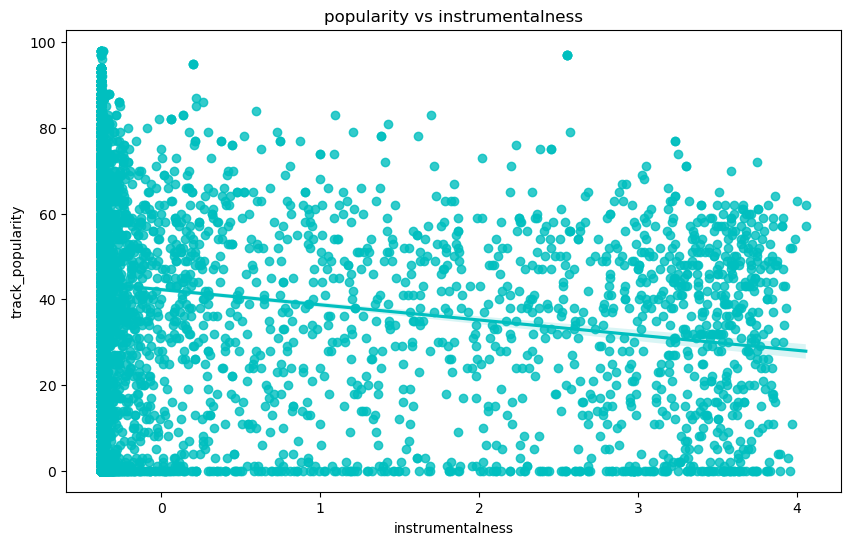

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample,y='track_popularity',x='instrumentalness',color = 'c').set(title= 'popularity vs instrumentalness')

[Text(0.5, 1.0, 'popularity vs energy')]

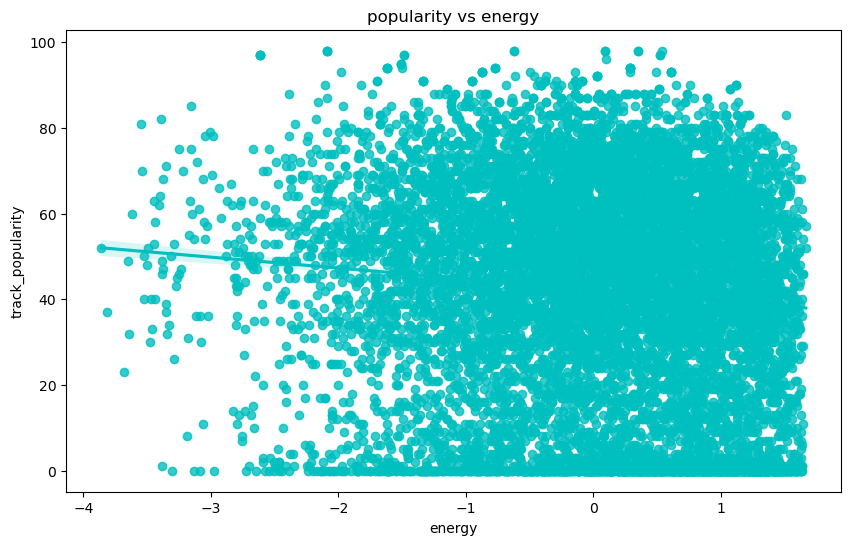

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample,y='track_popularity',x='energy',color = 'c').set(title= 'popularity vs energy')

[Text(0.5, 1.0, 'popularity vs acousticness')]

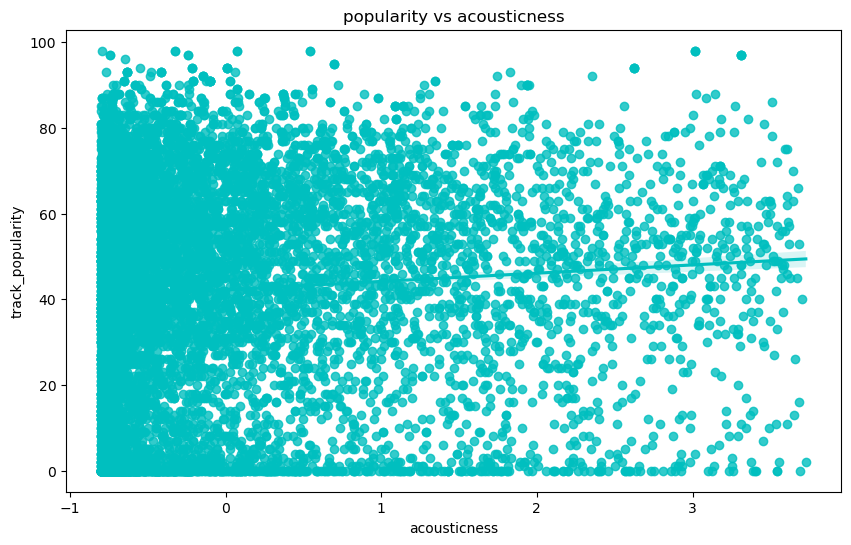

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample,y='track_popularity',x='acousticness',color = 'c').set(title= 'popularity vs acousticness')

In [34]:



# Select the target variable and feature variables
target = 'danceability'
features = ['energy', 'loudness', 'tempo']

# Create the input (X) and output (y) data
X = data[features]
y = data[target]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.16261664  0.1516978  -0.17395159]
Intercept: -4.6277334093692854e-18


KNN Algorithm


In [35]:
# Selecting the feature columns, excluding 'mode' at index 15
columns_before_mode = data.iloc[:, 14:15]  # 'loudness' column
columns_after_mode = data.iloc[:, 16:23]  # Columns right after 'mode' to 'duration_ms'
x = pd.concat([columns_before_mode, columns_after_mode], axis=1)

In [36]:
# Selecting the target variable
y = data.iloc[:, 15] 

In [37]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and fit the KNeighborsClassifier on the training data
knn = KNeighborsClassifier(n_neighbors=65)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=65)

In [40]:
# Predict on the test data
y_predict = knn.predict(x_test)

In [42]:
# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_predict})

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

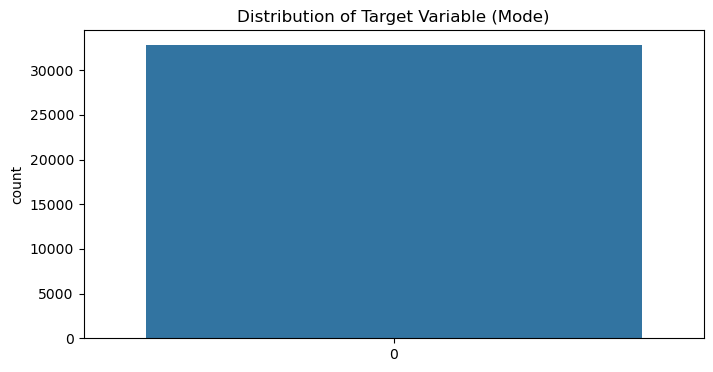

In [45]:
# Visualization of the target variable distribution
plt.figure(figsize=(8, 4))
sns.countplot(y)
plt.title('Distribution of Target Variable (Mode)')
plt.show()

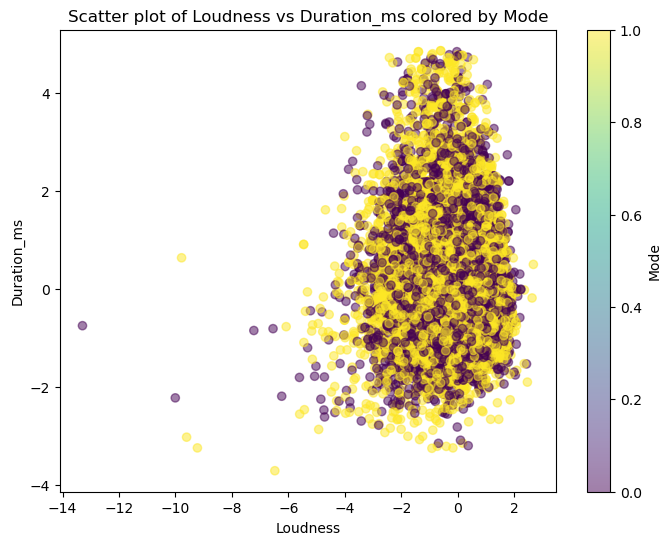

In [46]:
# Scatter plot of two features (example: 'loudness' and 'duration_ms')
plt.figure(figsize=(8, 6))
plt.scatter(x_train['loudness'], x_train.iloc[:, -1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Mode')
plt.xlabel('Loudness')
plt.ylabel('Duration_ms')
plt.title('Scatter plot of Loudness vs Duration_ms colored by Mode')
plt.show()

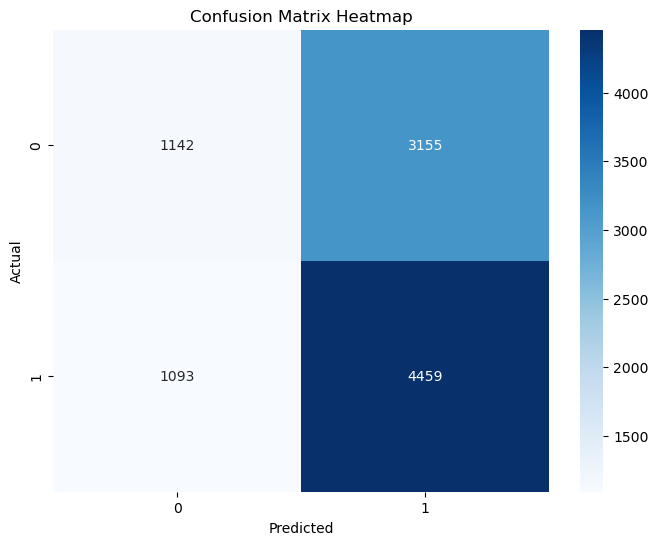

Accuracy Score: 0.5686871763630825


In [47]:
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("Accuracy Score:", accuracy)

LOGISTIC REGRESSION

In [49]:
file_path = 'spotify_songs.csv'
data = pd.read_csv(file_path)

In [50]:
# binary popularity: 1 if above median, 0 if below or equal
median_popularity = data['track_popularity'].median()
data['popular'] = (data['track_popularity'] > median_popularity).astype(int)

In [51]:
# Selecting the feature and the target
X = data[['danceability']]  # Keep it as DataFrame to preserve feature name
y = data['popular']  # Target variable

In [52]:
# Splitting Data for Training and Testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Defining and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)  

# Predicting and evaluating the model
y_pred = model.predict(X_test)  # Use the model to make predictions on the test set
print(classification_report(y_test, y_pred))  # Output the classification report to evaluate the model

              precision    recall  f1-score   support

           0       0.53      0.49      0.51      3326
           1       0.51      0.55      0.53      3241

    accuracy                           0.52      6567
   macro avg       0.52      0.52      0.52      6567
weighted avg       0.52      0.52      0.52      6567



In [56]:
# Visualization of the model
# DataFrame of danceability values from min to max for proper feature naming
x_values = pd.DataFrame({'danceability': np.linspace(X['danceability'].min(), X['danceability'].max(), 300)})
# Predict probabilities for these values
y_probs = model.predict_proba(x_values)[:, 1]

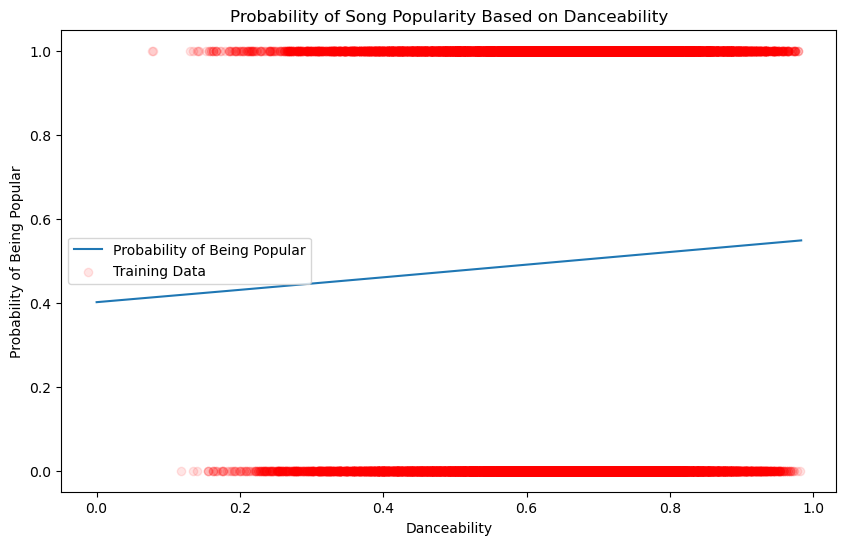

In [57]:
# Plotting:
plt.figure(figsize=(10, 6))
plt.plot(x_values['danceability'], y_probs, label='Probability of Being Popular',)
plt.scatter(X_train['danceability'], y_train, color='red', label='Training Data', alpha=0.1)
plt.title('Probability of Song Popularity Based on Danceability')
plt.xlabel('Danceability')
plt.ylabel('Probability of Being Popular')
plt.legend()
plt.show()